# ERA & TRMM

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import arrow as ar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from TRMM import TRMM
from ERA import ERA
from Visualization import Visualization

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
YEARS_ERA = range(1979, 2018)
YEARS_TRMM = range(1998, 2018)

In [11]:
# read onset dates
onset_dates = pd.read_csv('../00_DATA/onset_dates_v2.csv', sep=';')
onset_dates = onset_dates[onset_dates['year'] >= 1979]
onset_dates = onset_dates.set_index('year')

for col in ['imd', 'objective', 'eg_objective']:
    onset_dates[col] = onset_dates[col].apply(lambda string: ar.get(string, 'D MMM'))

onset_dates.head(3)

imd                  objective  \
year                                                         
1979  0001-06-16T00:00:00+00:00  0001-06-18T00:00:00+00:00   
1980  0001-06-04T00:00:00+00:00  0001-06-06T00:00:00+00:00   
1981  0001-06-01T00:00:00+00:00  0001-06-04T00:00:00+00:00   

                   eg_objective  
year                             
1979  0001-06-24T00:00:00+00:00  
1980  0001-06-17T00:00:00+00:00  
1981  0001-06-20T00:00:00+00:00

In [12]:
# read the ERA dataset

era_invariant = ERA.load_dataset_v2(YEARS_ERA, level='invariant', variables=['z'], timestamp=False)
era_surface = ERA.load_dataset_v2(YEARS_ERA, level='surface', variables=['sp', 'msl'], timestamp=False)
era_1000 = ERA.load_dataset_v2(YEARS_ERA, level=1000, variables=['r', 't'], timestamp=False)
era_700 = ERA.load_dataset_v2(YEARS_ERA, level=700, variables=['u', 'v'], timestamp=False)
era_200 = ERA.load_dataset_v2(YEARS_ERA, level=200, variables=['u', 'z'], timestamp=False)

era_1000['r'][1979].info()

> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2401 entries, (4.5, 61.5) to (40.5, 97.5)
Columns: 304 entries, 1979-01-01 to 1979-10-31
Freq: 24H
dtypes: float64(304)
memory usage: 5.6 MB


In [13]:
# read the TRMM dataset

trmm_dict = TRMM.load_dataset(
    YEARS_TRMM,
    range(3, 10),
    aggregation_resolution=None,
    timestamp=False,
    invalidate=False,
    bundled=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

trmm_dict[1998].info()

> Loading from cache...
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21609 entries, (4.125, 61.125) to (40.625, 97.625)
Columns: 214 entries, 1998-03-01 to 1998-09-30
dtypes: float64(214)
memory usage: 35.4 MB


## Geopotential

In [14]:
era_invariant['z'][1979].head(3)

time                1979-01-01  1979-01-02  1979-01-03  1979-01-04  \
latitude longitude                                                   
4.5      61.50        5.471956    5.471956    5.471956    5.471956   
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   

time                1979-01-05  1979-01-06  1979-01-07  1979-01-08  \
latitude longitude                                                   
4.5      61.50        5.471956    5.471956    5.471956    5.471956   
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   

time                1979-01-09  1979-01-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50        5.471956    5.471956     ...        5.471956   
         62.25       -1.810665   -1.810665     ...       -1.810665   
         63.00       -6.665745   -6.665745     ...       -6.665745   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50        5.471956    5.471956    5.471956    5.471956   
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50        5.471956    5.471956    5.471956    5.471956    5.471956  
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   -1.810665  
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   -6.665745  

[3 rows x 304 columns]

In [15]:
era_200['z'][1979].head(3)

time                   1979-01-01     1979-01-02     1979-01-03  \
latitude longitude                                                
4.5      61.50      121732.789162  121857.336061  121915.874513   
         62.25      121739.742365  121856.725306  121912.491873   
         63.00      121744.628399  121850.711725  121906.196406   

time                   1979-01-04     1979-01-05     1979-01-06  \
latitude longitude                                                
4.5      61.50      121894.357168  121768.682723  121770.655929   
         62.25      121895.249809  121767.132346  121771.877438   
         63.00      121894.310187  121764.172537  121772.018381   

time                   1979-01-07     1979-01-08     1979-01-09  \
latitude longitude                                                
4.5      61.50      121939.412044  121876.504350  121734.339538   
         62.25      121933.774312  121878.994348  121741.762552   
         63.00      121926.727147  121880.826611  121745.333116   

time                   1979-01-10      ...           1979-10-22  \
latitude longitude                     ...                        
4.5      61.50      121651.934687      ...        121917.330927   
         62.25      121665.841092      ...        121918.411492   
         63.00      121679.606555      ...        121912.632817   

time                   1979-10-23     1979-10-24     1979-10-25  \
latitude longitude                                                
4.5      61.50      121889.236228  121895.578677  121972.862588   
         62.25      121899.055278  121909.673007  121981.695035   
         63.00      121905.820557  121922.169980  121990.339558   

time                   1979-10-26     1979-10-27     1979-10-28  \
latitude longitude                                                
4.5      61.50      121932.317898  121840.986637  121852.450026   
         62.25      121934.432048  121846.577388  121854.141346   
         63.00      121934.009218  121851.463423  121853.295686   

time                   1979-10-29     1979-10-30     1979-10-31  
latitude longitude                                               
4.5      61.50      121894.451131  121967.929573  121979.158056  
         62.25      121911.317346  121983.997109  121985.594467  
         63.00      121926.680166  121996.118233  121990.809369  

[3 rows x 304 columns]

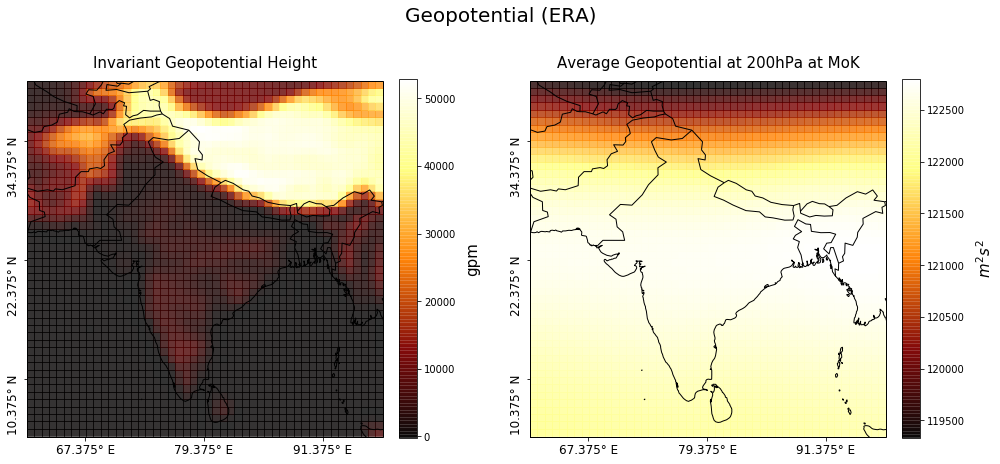

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(projection=ccrs.PlateCarree()))

z_invariant = Visualization.prepare_cartopy_df(era_invariant['z'], onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis(z_invariant, ax=axes[0], title='Invariant Geopotential Height', filename='output/geopotential_invariant.png', clabel='gpm')

z_onset = Visualization.prepare_cartopy_df(era_200['z'], onset_dates=onset_dates['objective'], offset=0)
Visualization.create_cartopy_vis(z_onset, ax=axes[1], title='Average Geopotential at 200hPa at MoK', filename='output/geopotential_onset.png', clabel='$m^2s^2$')

supttl = fig.suptitle('Geopotential (ERA)', size=20)
supttl.set_position([0.5, 1])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/geopotential.png', bbox_inches='tight')

## Mean Sea-Level Pressure

In [17]:
era_surface['msl'][1979].head(3)

time                   1979-01-01     1979-01-02     1979-01-03  \
latitude longitude                                                
4.5      61.50      101132.929462  101101.926551  101198.540272   
         62.25      101130.739764  101102.113477  101196.083538   
         63.00      101131.327244  101096.746048  101190.315555   

time                   1979-01-04     1979-01-05     1979-01-06  \
latitude longitude                                                
4.5      61.50      101269.384993  101276.675083  101392.969376   
         62.25      101271.788319  101273.737684  101387.415021   
         63.00      101274.699014  101275.687048  101382.688479   

time                   1979-01-07     1979-01-08     1979-01-09  \
latitude longitude                                                
4.5      61.50      101369.870739  101394.357964  101291.682521   
         62.25      101376.786978  101387.094578  101289.065565   
         63.00      101388.643388  101379.884599  101285.166836   

time                   1979-01-10      ...           1979-10-22  \
latitude longitude                     ...                        
4.5      61.50      101257.234843      ...        101105.718466   
         62.25      101256.513845      ...        101101.873144   
         63.00      101256.166698      ...        101098.455080   

time                   1979-10-23     1979-10-24     1979-10-25  \
latitude longitude                                                
4.5      61.50      101200.489636  101279.105113  101275.954085   
         62.25      101196.804536  101274.084831  101273.791091   
         63.00      101190.235444  101269.117956  101274.538792   

time                   1979-10-26     1979-10-27     1979-10-28  \
latitude longitude                                                
4.5      61.50      101212.746601  101103.635583  101014.926136   
         62.25      101203.026481  101087.319668  101008.357044   
         63.00      101195.202318  101072.152008  101003.416873   

time                   1979-10-29     1979-10-30     1979-10-31  
latitude longitude                                               
4.5      61.50      101057.625235  101022.616781  101010.840482  
         62.25      101042.804722  101013.590955  101011.000703  
         63.00      101031.268756  101009.799040  101011.908627  

[3 rows x 304 columns]

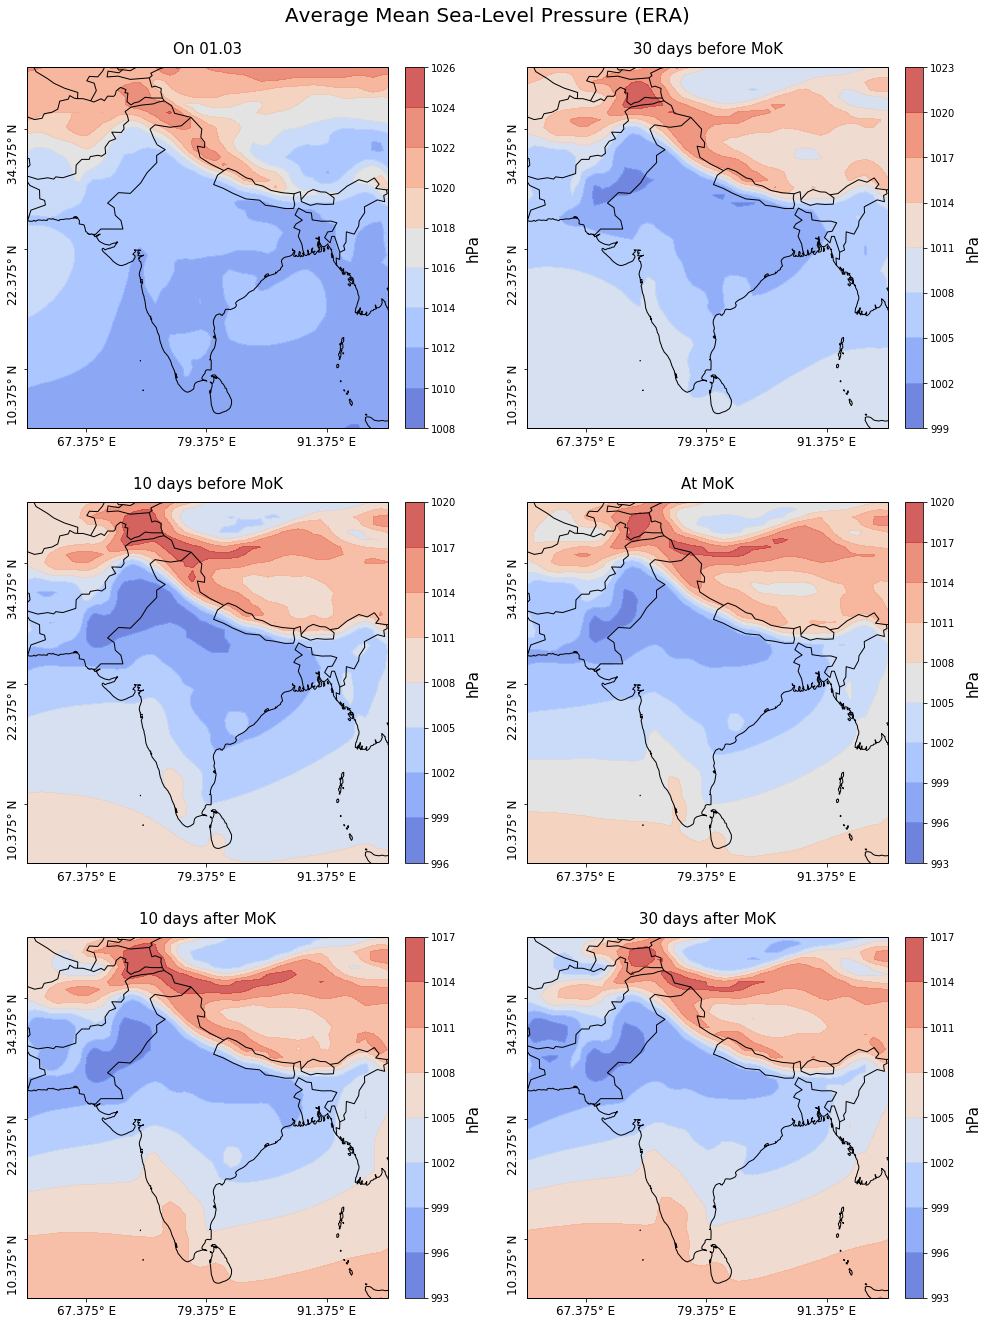

In [63]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18), subplot_kw=dict(projection=ccrs.PlateCarree()))

msl_first = Visualization.prepare_cartopy_df(era_surface['msl'], month=3, day=1)
msl_first['val'] = msl_first['val'] / 100
Visualization.create_cartopy_vis(msl_first, ax=axes[0, 0], title='On 01.03', vis_type='contour', cmap='coolwarm', clabel='hPa')

msl_min30 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=-30)
msl_min30['val'] = msl_min30['val'] / 100
Visualization.create_cartopy_vis(msl_min30, ax=axes[0, 1], title='30 days before MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_min10 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=-10)
msl_min10['val'] = msl_min10['val'] / 100
Visualization.create_cartopy_vis(msl_min10, ax=axes[1, 0], title='10 days before MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_onset = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'])
msl_onset['val'] = msl_onset['val'] / 100
Visualization.create_cartopy_vis(msl_onset, ax=axes[1, 1], title='At MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_plus10 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=+10)
msl_plus10['val'] = msl_plus10['val'] / 100
Visualization.create_cartopy_vis(msl_plus10, ax=axes[2, 0], title='10 days after MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_plus30 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=+30)
msl_plus30['val'] = msl_plus30['val'] / 100
Visualization.create_cartopy_vis(msl_plus30, ax=axes[2, 1], title='30 days after MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

supttl = fig.suptitle('Average Mean Sea-Level Pressure (ERA)', size=20)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/msl_avg.png', bbox_inches='tight')

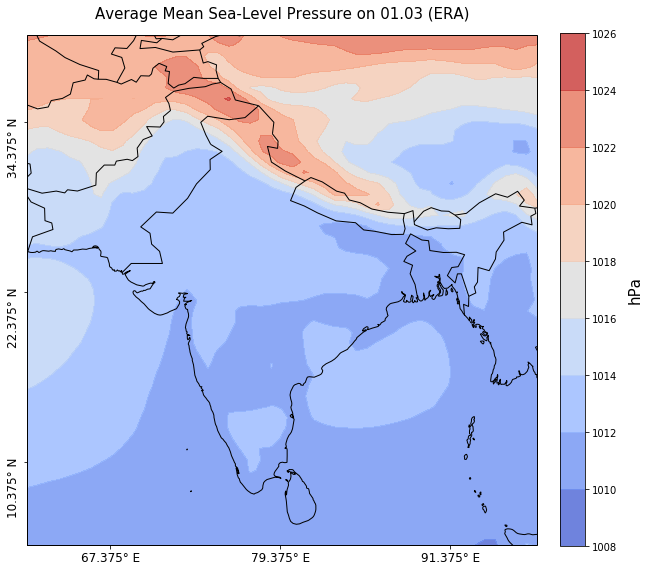

In [19]:
Visualization.create_cartopy_vis(msl_first, title='Average Mean Sea-Level Pressure on 01.03 (ERA)', filename='output/msl_avg_first.png', vis_type='contour', cmap='coolwarm', clabel='hPa')

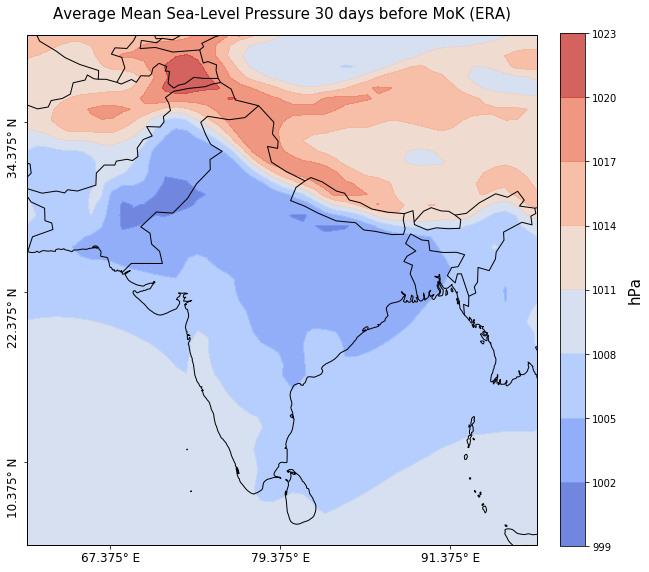

In [20]:
Visualization.create_cartopy_vis(msl_min30, title='Average Mean Sea-Level Pressure 30 days before MoK (ERA)', filename='output/msl_avg_min30.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

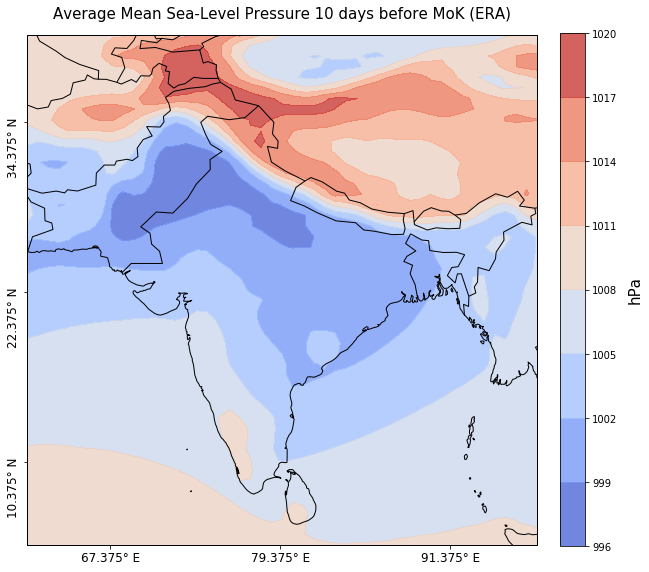

In [21]:
Visualization.create_cartopy_vis(msl_min10, title='Average Mean Sea-Level Pressure 10 days before MoK (ERA)', filename='output/msl_avg_min10.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

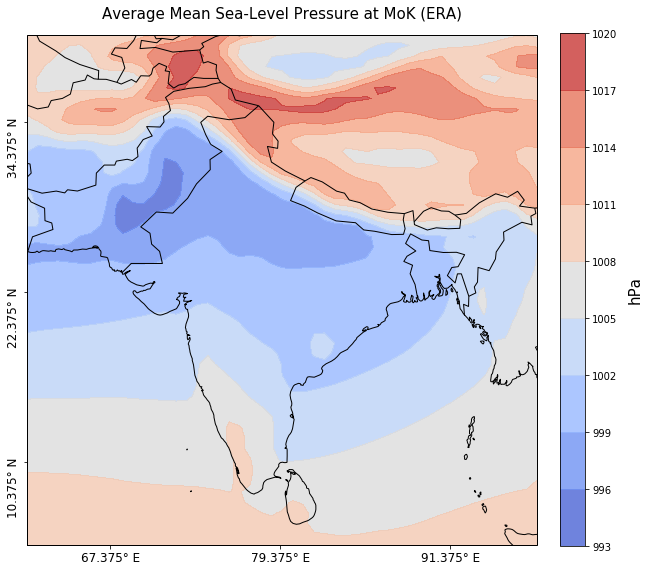

In [22]:
Visualization.create_cartopy_vis(msl_onset, title='Average Mean Sea-Level Pressure at MoK (ERA)', filename='output/msl_avg_onset.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

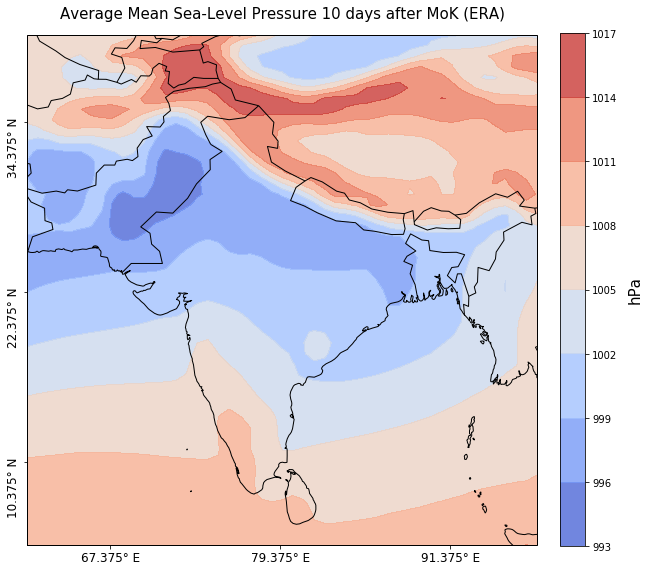

In [23]:
Visualization.create_cartopy_vis(msl_plus10, title='Average Mean Sea-Level Pressure 10 days after MoK (ERA)', filename='output/mean_avg_plus10.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

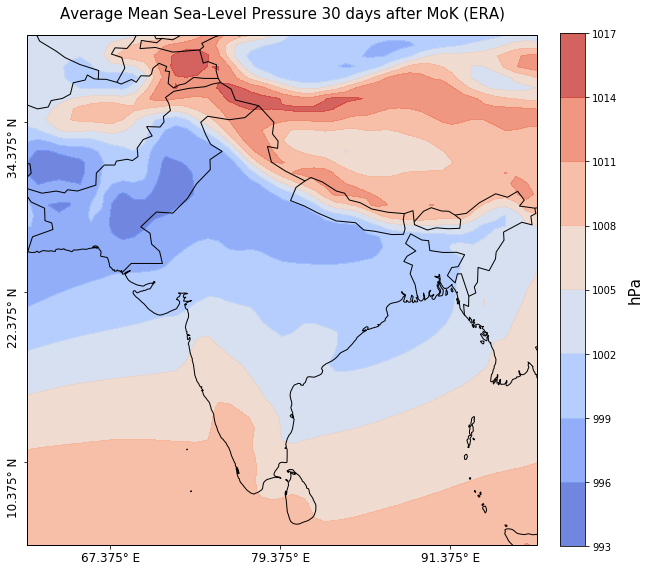

In [24]:
Visualization.create_cartopy_vis(msl_plus30, title='Average Mean Sea-Level Pressure 30 days after MoK (ERA)', filename='output/mean_avg_plus30.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

## Relative Humidity at 1000 hPa

In [25]:
era_1000['r'][1979].head(3)

time                1979-01-01  1979-01-02  1979-01-03  1979-01-04  \
latitude longitude                                                   
4.5      61.50       79.142574   86.735883   82.635444   80.749002   
         62.25       79.081974   86.178989   83.446755   79.259072   
         63.00       80.040606   84.343220   82.688208   77.903927   

time                1979-01-05  1979-01-06  1979-01-07  1979-01-08  \
latitude longitude                                                   
4.5      61.50       83.035092   73.142632   79.780966   74.808092   
         62.25       79.602822   73.738708   77.238369   74.809137   
         63.00       76.872678   74.132609   75.106914   76.272945   

time                1979-01-09  1979-01-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50       85.217744   88.954060     ...       76.488181   
         62.25       87.724816   88.494334     ...       77.139633   
         63.00       87.354946   89.219969     ...       77.362182   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50        83.15577   79.678050   74.867125   83.796774   
         62.25        83.15577   79.087720   77.485994   86.169585   
         63.00        81.78025   78.330218   81.917645   87.588466   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50       86.606847   80.414656   80.103296   79.732381   77.748769  
         62.25       85.990397   80.694148   80.884830   78.895994   76.364368  
         63.00       85.687396   80.978342   80.926100   80.498242   76.820437  

[3 rows x 304 columns]

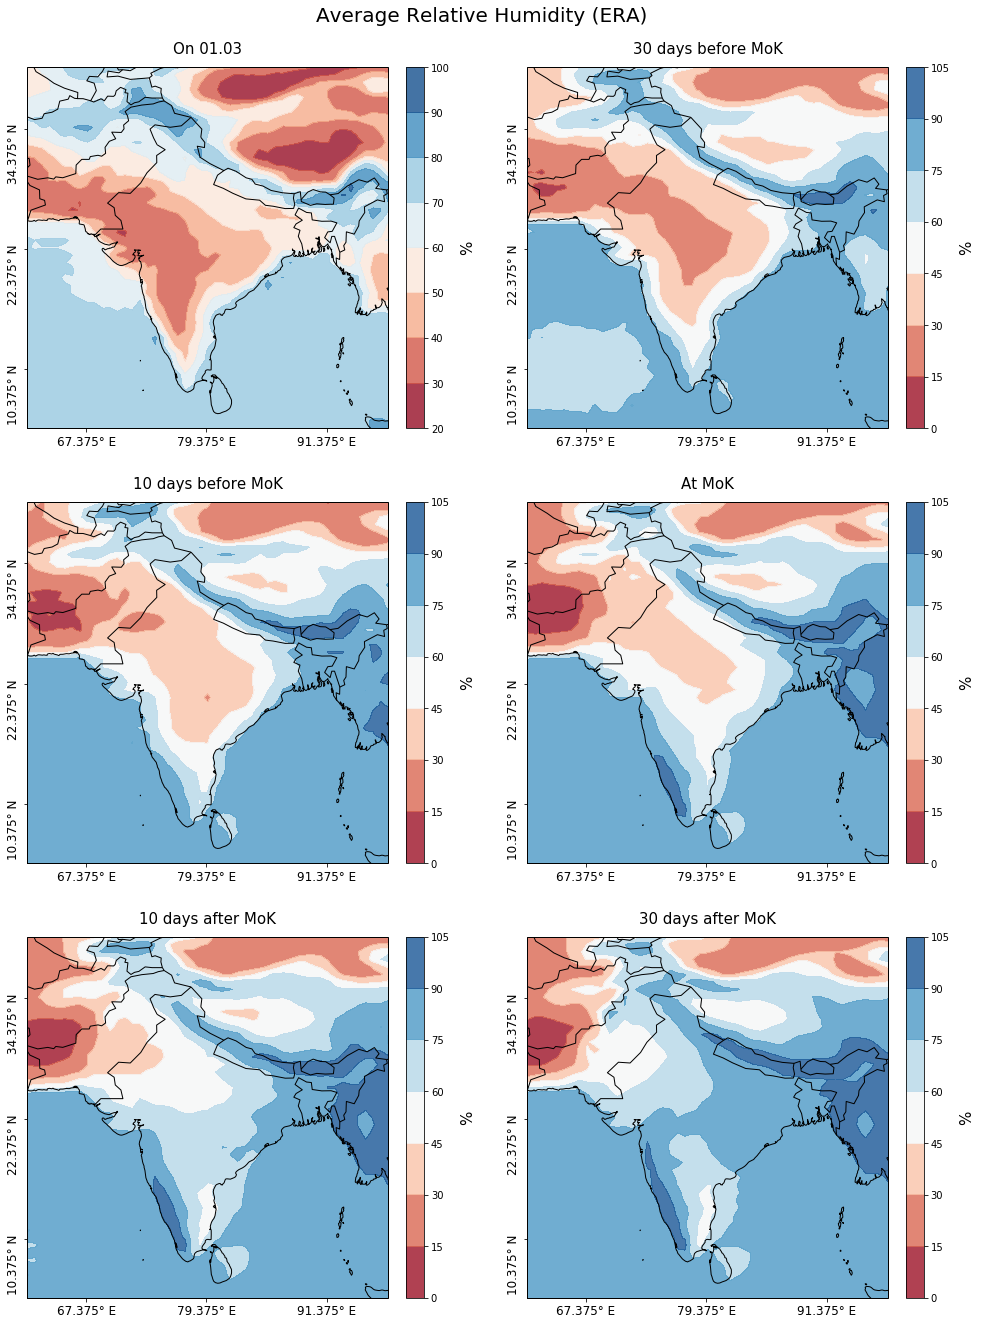

In [65]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18), subplot_kw=dict(projection=ccrs.PlateCarree()))

r_first = Visualization.prepare_cartopy_df(era_1000['r'], month=3, day=1)
Visualization.create_cartopy_vis(r_first, ax=axes[0, 0], title='On 01.03', vis_type='contour', cmap='RdBu', clabel='%')

r_min30 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=-30)
Visualization.create_cartopy_vis(r_min30, ax=axes[0, 1], title='30 days before MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_min10 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=-10)
Visualization.create_cartopy_vis(r_min10, ax=axes[1, 0], title='10 days before MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_onset = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis(r_onset, ax=axes[1, 1], title='At MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_plus10 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=+10)
Visualization.create_cartopy_vis(r_plus10, ax=axes[2, 0], title='10 days after MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_plus30 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=+30)
Visualization.create_cartopy_vis(r_plus30, ax=axes[2, 1], title='30 days after MoK', vis_type='contour', cmap='RdBu', clabel='%')

supttl = fig.suptitle('Average Relative Humidity (ERA)', size=20)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/r_avg.png', bbox_inches='tight')

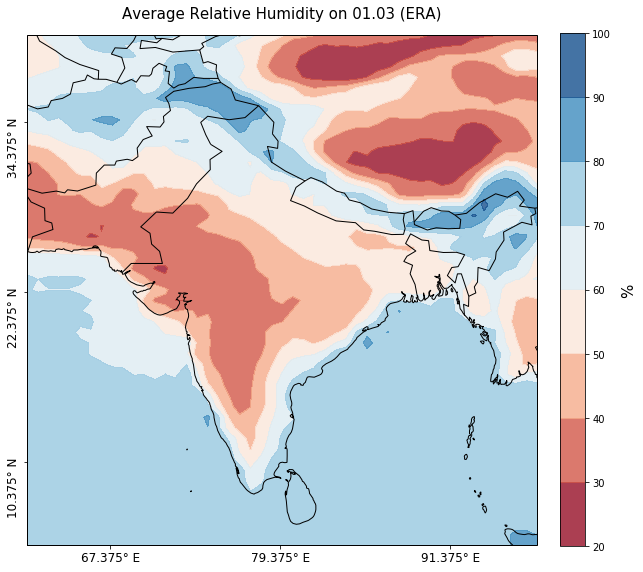

In [27]:
Visualization.create_cartopy_vis(r_first, title='Average Relative Humidity on 01.03 (ERA)', filename='output/r_avg_first.png', vis_type='contour', cmap='RdBu', clabel='%')

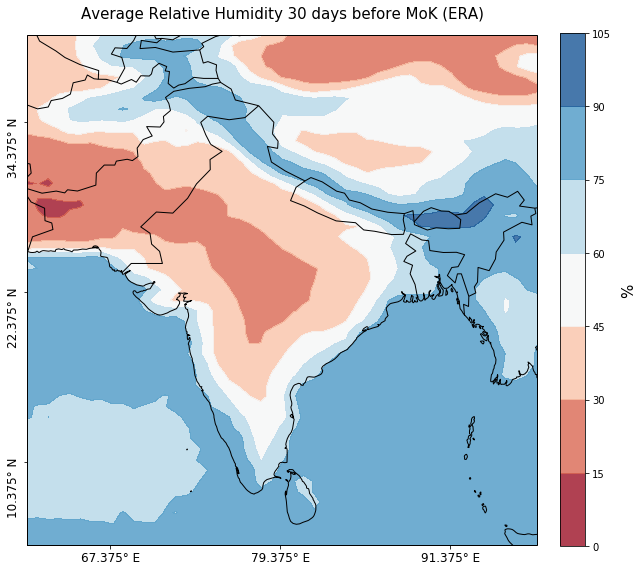

In [28]:
Visualization.create_cartopy_vis(r_min30, title='Average Relative Humidity 30 days before MoK (ERA)', filename='output/r_avg_min30.png', vis_type='contour', cmap='RdBu', clabel='%')

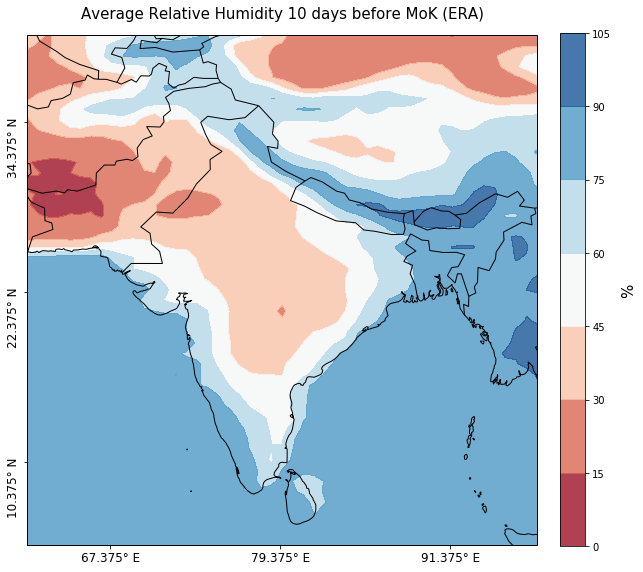

In [29]:
Visualization.create_cartopy_vis(r_min10, title='Average Relative Humidity 10 days before MoK (ERA)', filename='output/r_avg_min10.png', vis_type='contour', cmap='RdBu', clabel='%')

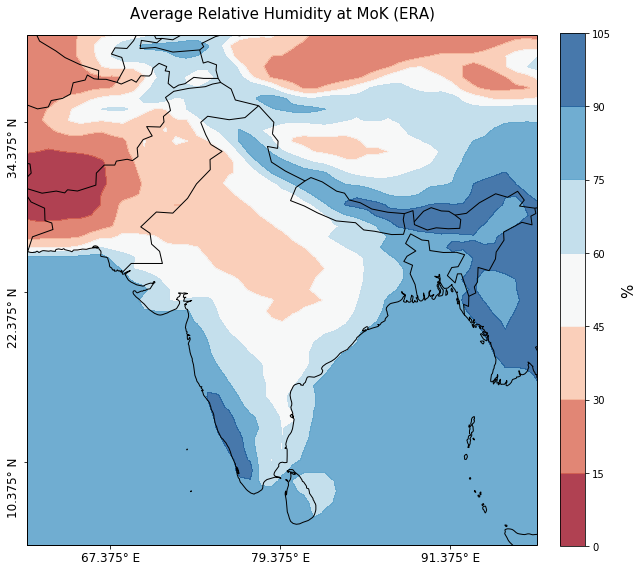

In [30]:
Visualization.create_cartopy_vis(r_onset, title='Average Relative Humidity at MoK (ERA)', filename='output/r_avg_onset.png', vis_type='contour', cmap='RdBu', clabel='%')

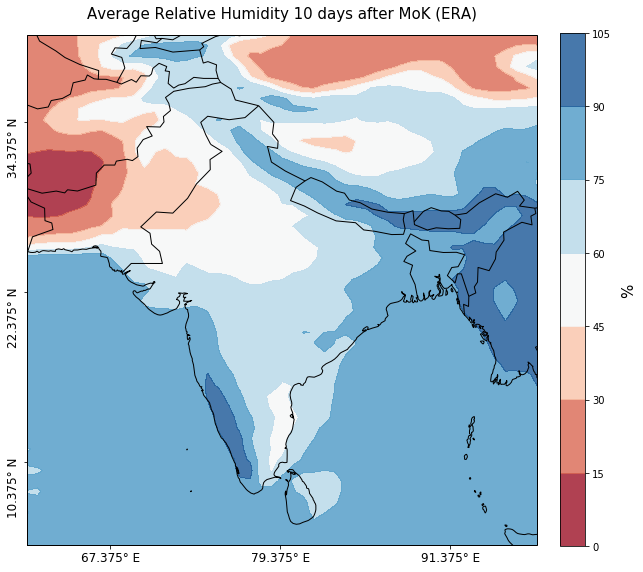

In [31]:
Visualization.create_cartopy_vis(r_plus10, title='Average Relative Humidity 10 days after MoK (ERA)', filename='output/r_avg_plus10.png', vis_type='contour', cmap='RdBu', clabel='%')

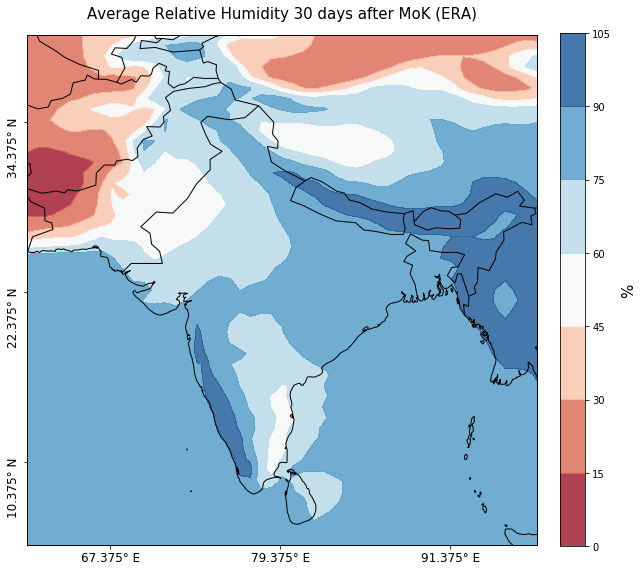

In [32]:
Visualization.create_cartopy_vis(r_plus30, title='Average Relative Humidity 30 days after MoK (ERA)', filename='output/r_avg_plus30.png', vis_type='contour', cmap='RdBu', clabel='%')

## Temperature at 1000 hPa

In [33]:
era_1000['t'][1979].head(3)

time                1979-01-01  1979-01-02  1979-01-03  1979-01-04  \
latitude longitude                                                   
4.5      61.50      299.119357  298.134249  298.514377  299.219683   
         62.25      299.070203  298.071482  298.479087  299.329840   
         63.00      298.985001  298.497488  298.712508  299.436972   

time                1979-01-05  1979-01-06  1979-01-07  1979-01-08  \
latitude longitude                                                   
4.5      61.50      298.511857  298.663354  298.649238  298.643692   
         62.25      298.783846  298.632096  298.744522  298.714777   
         63.00      298.914420  298.686041  298.712256  298.734439   

time                1979-01-09  1979-01-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50      298.230541  297.841085     ...      299.824663   
         62.25      298.028881  297.883686     ...      299.742487   
         63.00      298.132484  297.793695     ...      299.688795   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50      298.396154  298.485641  299.448819  298.275410   
         62.25      298.297593  298.575128  299.145069  297.944688   
         63.00      298.417329  298.699905  298.622518  297.901079   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50      297.750843  299.140027  299.338915  299.616953  300.048758  
         62.25      297.993339  299.109778  299.520913  299.794666  300.075225  
         63.00      298.141307  299.047768  299.634346  299.710473  299.905579  

[3 rows x 304 columns]

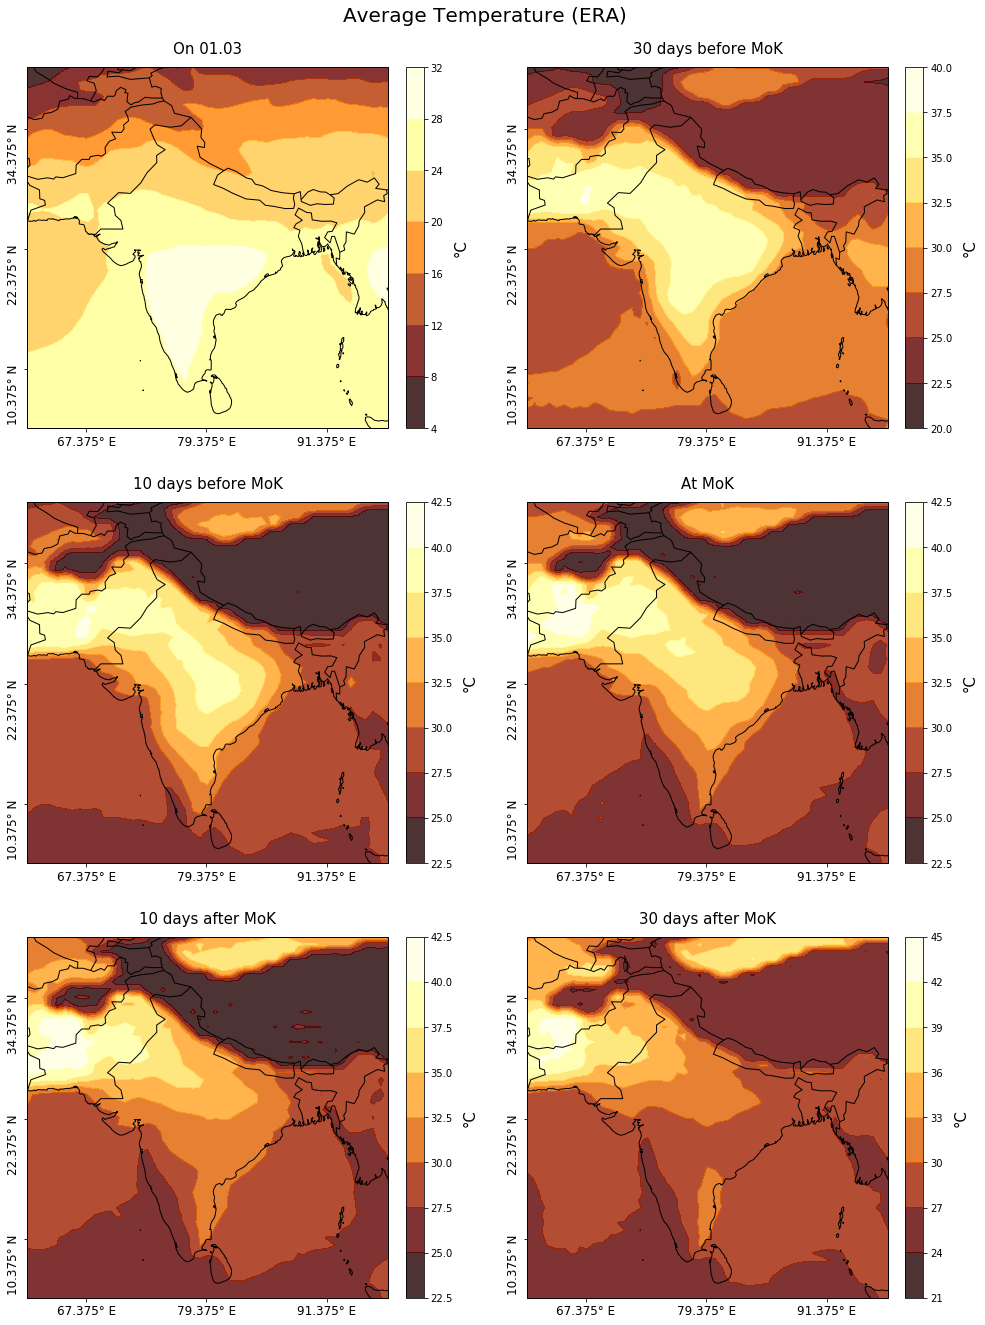

In [66]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18), subplot_kw=dict(projection=ccrs.PlateCarree()))

t_first = Visualization.prepare_cartopy_df(era_1000['t'], month=3, day=1)
t_first['val'] = t_first['val'] - 273.15
Visualization.create_cartopy_vis(t_first, ax=axes[0, 0], title='On 01.03', vis_type='contour', clabel='°C')

t_min30 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=-30)
t_min30['val'] = t_min30['val'] - 273.15
Visualization.create_cartopy_vis(t_min30, ax=axes[0, 1], title='30 days before MoK', vis_type='contour', clabel='°C')

t_min10 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=-10)
t_min10['val'] = t_min10['val'] - 273.15
Visualization.create_cartopy_vis(t_min10, ax=axes[1, 0], title='10 days before MoK', vis_type='contour', clabel='°C')

t_onset = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'])
t_onset['val'] = t_onset['val'] - 273.15
Visualization.create_cartopy_vis(t_onset, ax=axes[1, 1], title='At MoK', vis_type='contour', clabel='°C')

t_plus10 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=+10)
t_plus10['val'] = t_plus10['val'] - 273.15
Visualization.create_cartopy_vis(t_plus10, ax=axes[2, 0], title='10 days after MoK', vis_type='contour', clabel='°C')

t_plus30 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=+30)
t_plus30['val'] = t_plus30['val'] - 273.15
Visualization.create_cartopy_vis(t_plus30, ax=axes[2, 1], title='30 days after MoK', vis_type='contour', clabel='°C')

supttl = fig.suptitle('Average Temperature (ERA)', size=20)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/t_avg.png', bbox_inches='tight')

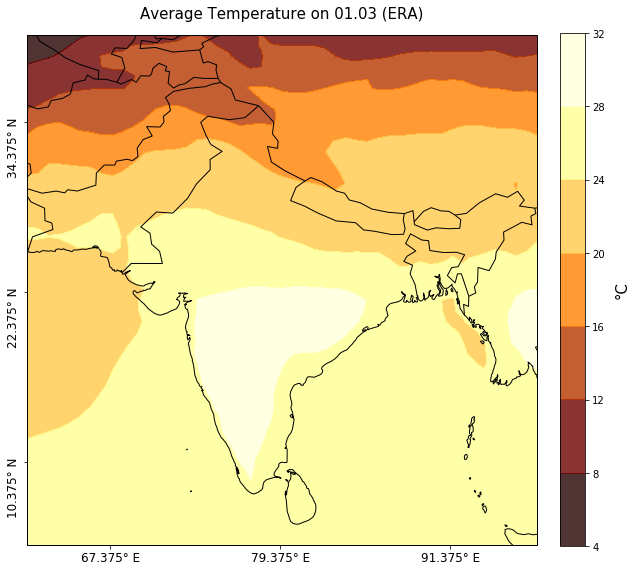

In [35]:
Visualization.create_cartopy_vis(t_first, title='Average Temperature on 01.03 (ERA)', filename='output/t_avg_first.png', vis_type='contour', clabel='°C')

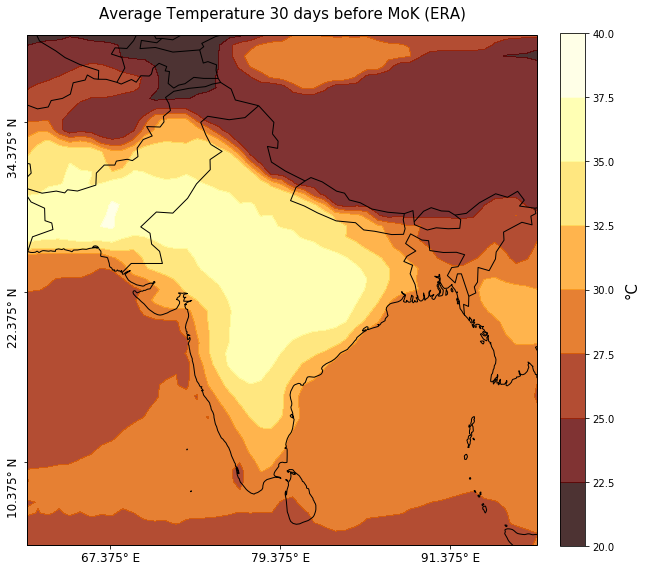

In [36]:
Visualization.create_cartopy_vis(t_min30, title='Average Temperature 30 days before MoK (ERA)', filename='output/t_avg_min30.png', vis_type='contour', clabel='°C')

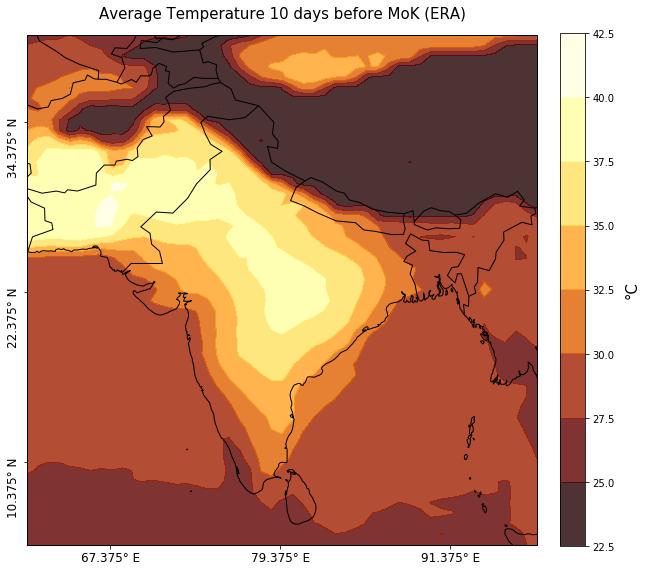

In [37]:
Visualization.create_cartopy_vis(t_min10, title='Average Temperature 10 days before MoK (ERA)', filename='output/t_avg_min10.png', vis_type='contour', clabel='°C')

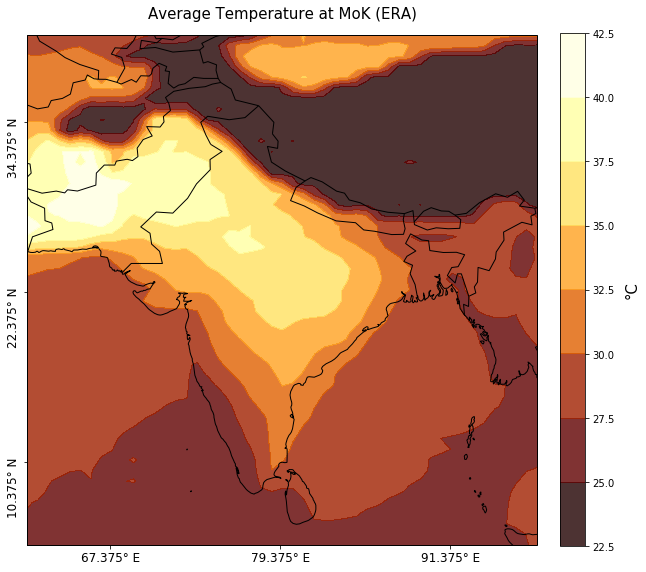

In [38]:
Visualization.create_cartopy_vis(t_onset, title='Average Temperature at MoK (ERA)', filename='output/t_avg_onset.png', vis_type='contour', clabel='°C')

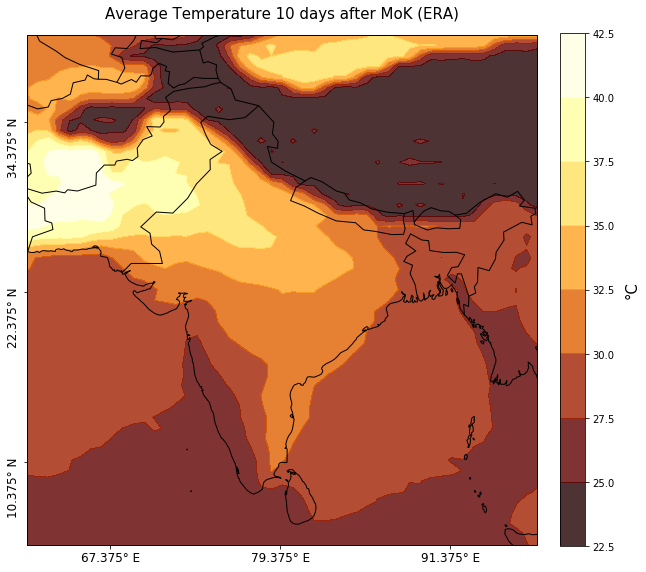

In [39]:
Visualization.create_cartopy_vis(t_plus10, title='Average Temperature 10 days after MoK (ERA)', filename='output/t_avg_plus10.png', vis_type='contour', clabel='°C')

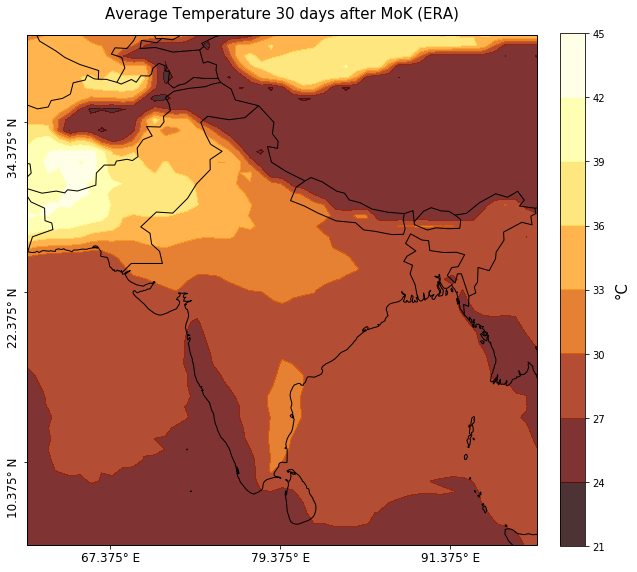

In [40]:
Visualization.create_cartopy_vis(t_plus30, title='Average Temperature 30 days after MoK (ERA)', filename='output/t_avg_plus30.png', vis_type='contour', clabel='°C')

## Wind at 700hPa

In [41]:
era_700['u'][1979].head(3)

time                1979-01-01  1979-01-02  1979-01-03  1979-01-04  \
latitude longitude                                                   
4.5      61.50       -4.940515   -9.115357   -8.863565   -8.817240   
         62.25       -5.422015   -9.102875   -9.047428   -8.963418   
         63.00       -5.746536   -9.222650   -9.139600   -9.100475   

time                1979-01-05  1979-01-06  1979-01-07  1979-01-08  \
latitude longitude                                                   
4.5      61.50       -6.767383   -3.644353   -4.754012   -6.036972   
         62.25       -6.412859   -3.579545   -4.902830   -6.031692   
         63.00       -6.010569   -3.523138   -5.152462   -5.980325   

time                1979-01-09  1979-01-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50       -5.146701   -4.434532     ...       -3.314792   
         62.25       -4.859385   -4.157537     ...       -3.305911   
         63.00       -4.670001   -4.002238     ...       -3.360638   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50       -2.409159   -3.684198   -3.005393   -0.808879   
         62.25       -2.407479   -3.503696   -2.730079   -0.519883   
         63.00       -2.458365   -3.319593   -2.525333   -0.030462   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50        5.012568    6.475071    4.378169    3.901710    3.996521  
         62.25        5.315006    7.521602    5.262200    4.413934    4.298719  
         63.00        5.723537    8.593336    6.199037    4.976804    4.451618  

[3 rows x 304 columns]

In [42]:
era_700['v'][1979].head(3)

time                1979-01-01  1979-01-02  1979-01-03  1979-01-04  \
latitude longitude                                                   
4.5      61.50       -1.071205   -0.713026   -0.706522    0.859867   
         62.25       -0.859707   -0.884154   -0.702933    0.748399   
         63.00       -0.649554   -0.909498   -0.704055    0.479484   

time                1979-01-05  1979-01-06  1979-01-07  1979-01-08  \
latitude longitude                                                   
4.5      61.50       -0.007882   -0.964223   -1.589074    0.356802   
         62.25       -0.280834   -1.118305   -1.610381    0.400761   
         63.00       -0.599091   -1.256239   -1.671386    0.479484   

time                1979-01-09  1979-01-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50       -0.473941   -1.720055     ...       -1.113819   
         62.25       -0.438056   -1.699645     ...       -0.950317   
         63.00       -0.334662   -1.633258     ...       -0.973867   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50       -1.191645   -0.935963   -1.998390   -0.909049   
         62.25       -1.318813   -1.025676   -2.395594   -0.937533   
         63.00       -1.353577   -1.191870   -2.645893   -0.984632   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50        0.698384   -1.923928   -1.626529   -1.548479    0.775313  
         62.25        1.094019   -1.124360   -1.506762   -1.261397    0.836542  
         63.00        1.324132   -0.021787   -1.141182   -0.912862    0.901360  

[3 rows x 304 columns]

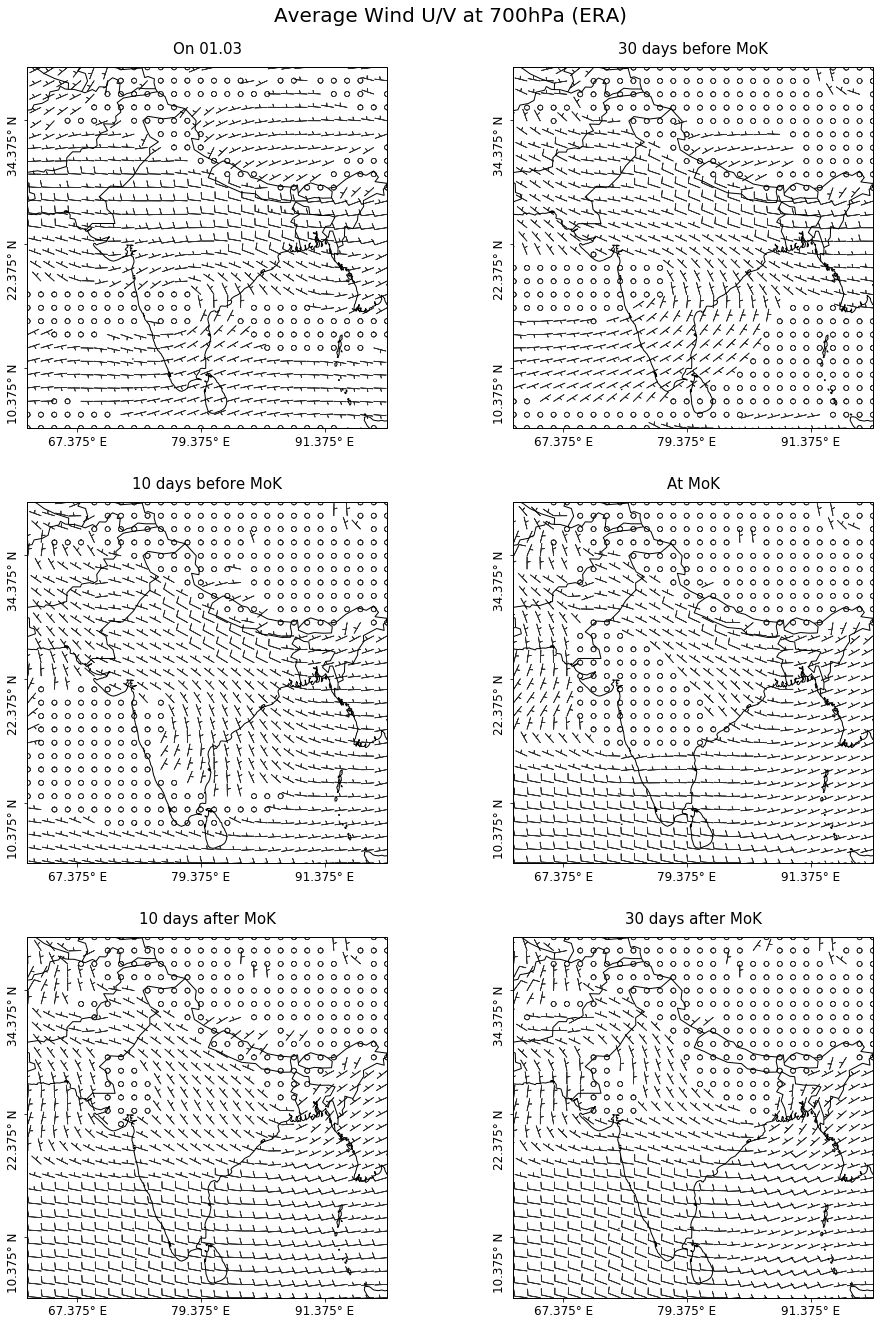

In [67]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18), subplot_kw=dict(projection=ccrs.PlateCarree()))

u_onset = Visualization.prepare_cartopy_df(era_700['u'], month=3, day=1)
v_onset = Visualization.prepare_cartopy_df(era_700['v'], month=3, day=1)
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, ax=axes[0, 0], title='On 01.03', clabel='$ms^{-1}$', vis_type='barbs')

v_min30 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=-30)
u_min30 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=-30)
Visualization.create_cartopy_vis({'u': u_min30, 'v': v_min30}, ax=axes[0, 1], title='30 days before MoK', clabel='$ms^{-1}$', vis_type='barbs')

u_min10 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=-10)
v_min10 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=-10)
Visualization.create_cartopy_vis({'u': u_min10, 'v': v_min10}, ax=axes[1, 0], title='10 days before MoK', clabel='$ms^{-1}$', vis_type='barbs')

v_onset = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'])
u_onset = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, ax=axes[1, 1], title='At MoK', clabel='$ms^{-1}$', vis_type='barbs')

v_plus10 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=+10)
u_plus10 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=+10)
Visualization.create_cartopy_vis({'u': u_plus10, 'v': v_plus10}, ax=axes[2, 0], title='10 days after MoK', clabel='$ms^{-1}$', vis_type='barbs')

v_plus30 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=+30)
u_plus30 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=+30)
Visualization.create_cartopy_vis({'u': u_plus30, 'v': v_plus30}, ax=axes[2, 1], title='30 days after MoK', clabel='$ms^{-1}$', vis_type='barbs')

supttl = fig.suptitle('Average Wind U/V at 700hPa (ERA)', size=20)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/wind_avg.png', bbox_inches='tight')

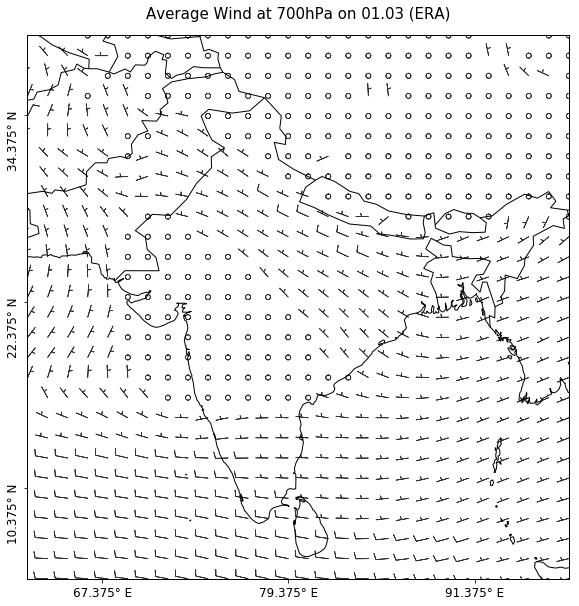

In [44]:
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, title='Average Wind at 700hPa on 01.03 (ERA)', filename='output/wind_avg_onset.png', clabel='$ms^{-1}$', vis_type='barbs')

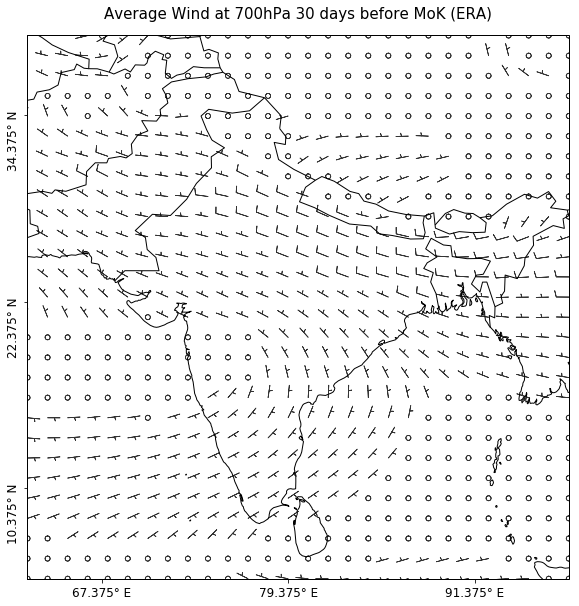

In [45]:
Visualization.create_cartopy_vis({'u': u_min30, 'v': v_min30}, title='Average Wind at 700hPa 30 days before MoK (ERA)', filename='output/wind_avg_min30.png', clabel='$ms^{-1}$', vis_type='barbs')

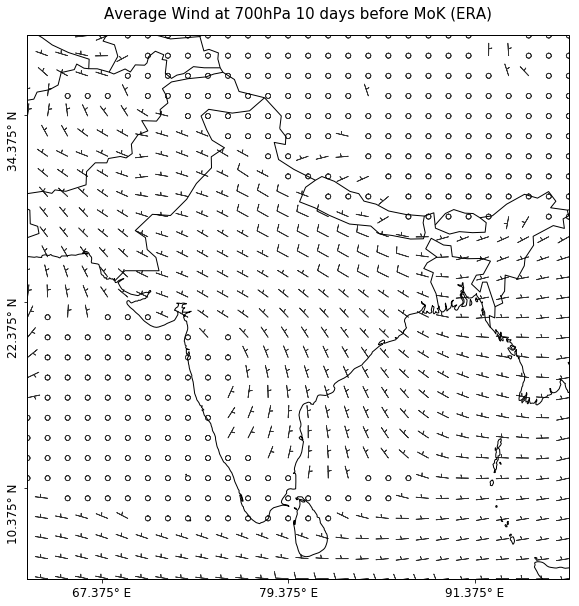

In [46]:
Visualization.create_cartopy_vis({'u': u_min10, 'v': v_min10}, title='Average Wind at 700hPa 10 days before MoK (ERA)', filename='output/wind_avg_min10.png', clabel='$ms^{-1}$', vis_type='barbs')

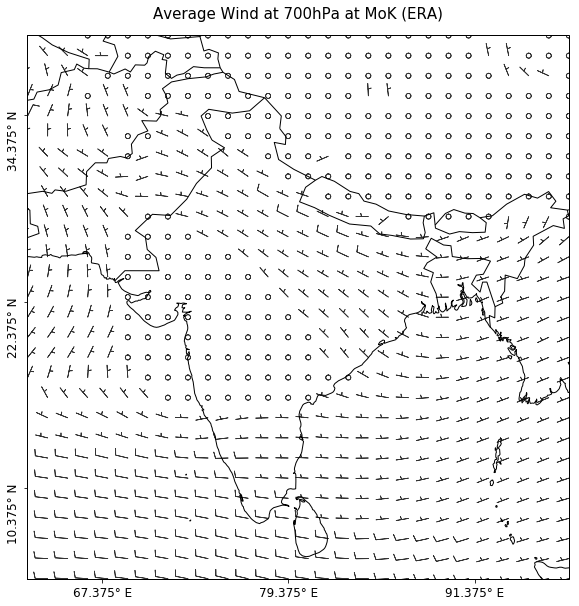

In [47]:
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, title='Average Wind at 700hPa at MoK (ERA)', filename='output/wind_avg_onset.png', clabel='$ms^{-1}$', vis_type='barbs')

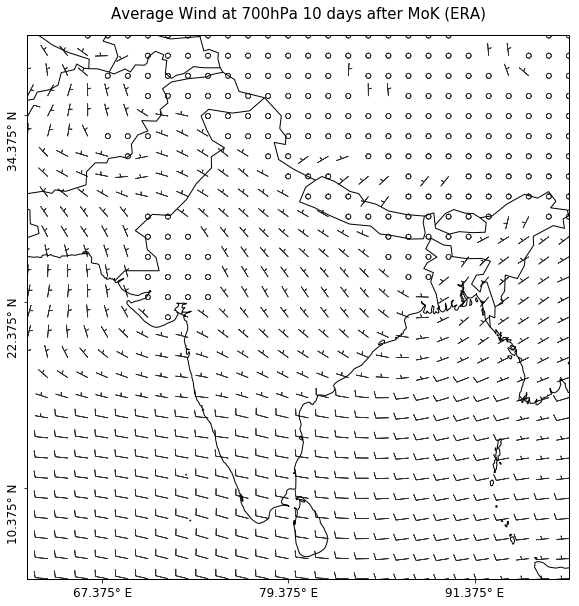

In [48]:
Visualization.create_cartopy_vis({'u': u_plus10, 'v': v_plus10}, title='Average Wind at 700hPa 10 days after MoK (ERA)', filename='output/wind_avg_plus10.png', clabel='$ms^{-1}$', vis_type='barbs')

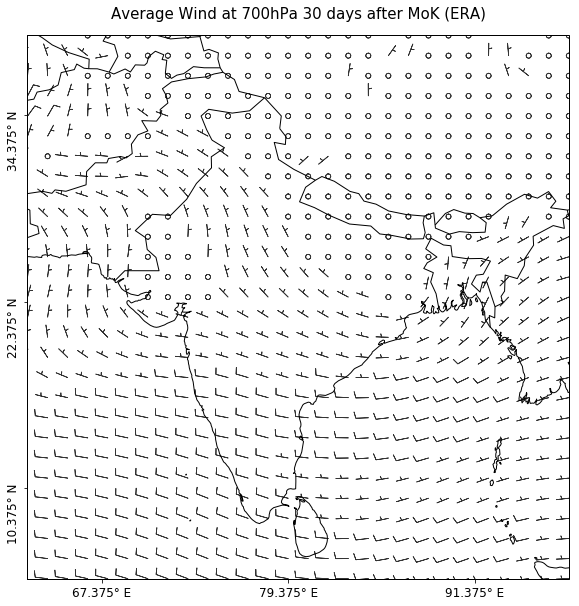

In [49]:
Visualization.create_cartopy_vis({'u': u_plus30, 'v': v_plus30}, title='Average Wind at 700hPa 30 days after MoK (ERA)', filename='output/wind_avg_plus30.png', clabel='$ms^{-1}$', vis_type='barbs')

## Precipitation

In [50]:
prec_params = dict(
    index_step=12,
    clabel='mm/day',
    gaussian_filtering=0.3
)

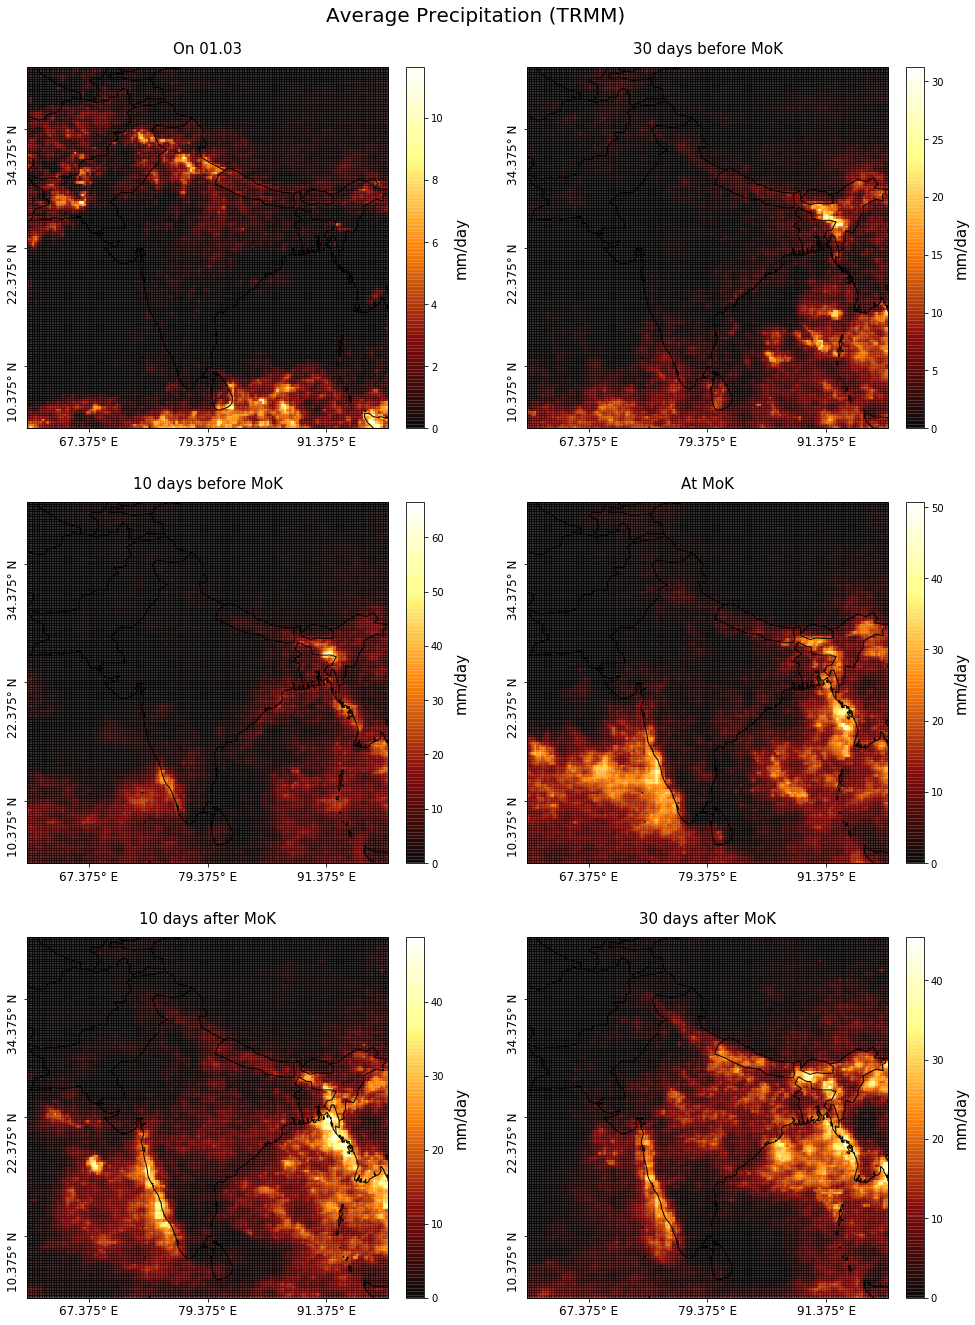

In [68]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18), subplot_kw=dict(projection=ccrs.PlateCarree()))

prec_average = Visualization.prepare_cartopy_df(trmm_dict, month=3, day=1)
Visualization.create_cartopy_vis(prec_average, ax=axes[0, 0], title='On 01.03', **prec_params)

prec_min30 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=-30)
Visualization.create_cartopy_vis(prec_min30, ax=axes[0, 1], title='30 days before MoK', **prec_params)

prec_min10 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=-10)
Visualization.create_cartopy_vis(prec_min10, ax=axes[1, 0], title='10 days before MoK', **prec_params)

prec_onset = Visualization.prepare_cartopy_df(trmm_dict, YEARS_TRMM, onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis(prec_onset, ax=axes[1, 1], title='At MoK', **prec_params)

prec_plus10 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=+10)
Visualization.create_cartopy_vis(prec_plus10, ax=axes[2, 0], title='10 days after MoK', **prec_params)

prec_plus30 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=+30)
Visualization.create_cartopy_vis(prec_plus30, ax=axes[2, 1], title='30 days after MoK', **prec_params)

supttl = fig.suptitle('Average Precipitation (TRMM)', size=20)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/prec_avg.png', bbox_inches='tight')

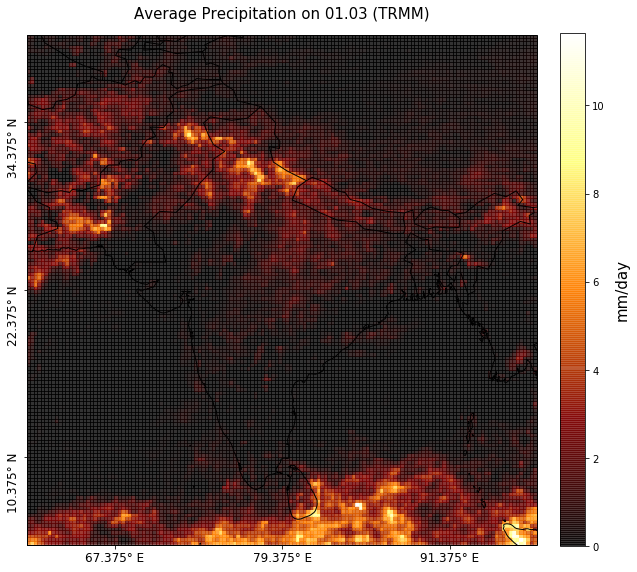

In [52]:
Visualization.create_cartopy_vis(prec_average, title='Average Precipitation on 01.03 (TRMM)', filename='output/prec_avg_first.png', **prec_params)

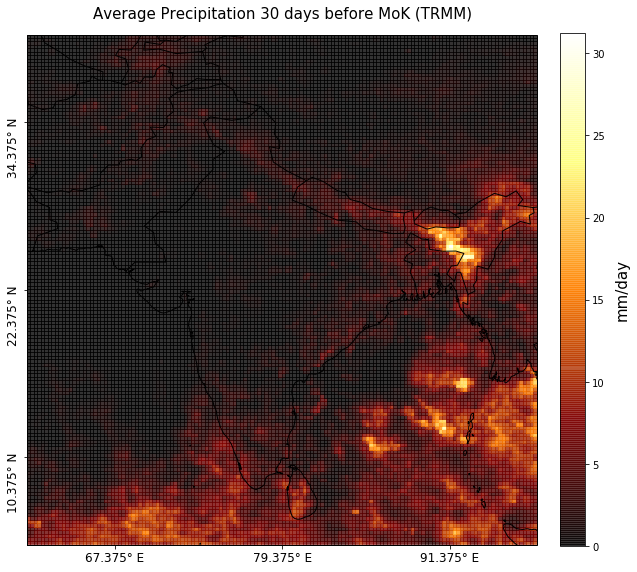

In [53]:
Visualization.create_cartopy_vis(prec_min30, title='Average Precipitation 30 days before MoK (TRMM)', filename='output/prec_avg_min30.png', **prec_params)

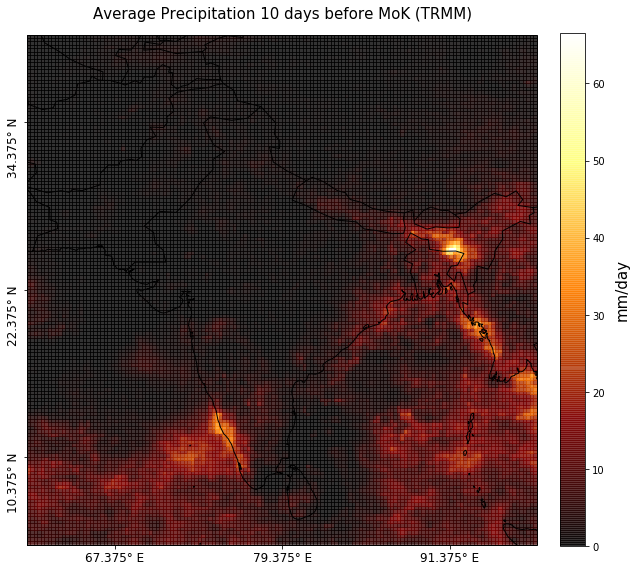

In [54]:
Visualization.create_cartopy_vis(prec_min10, title='Average Precipitation 10 days before MoK (TRMM)', filename='output/prec_avg_min10.png', **prec_params)

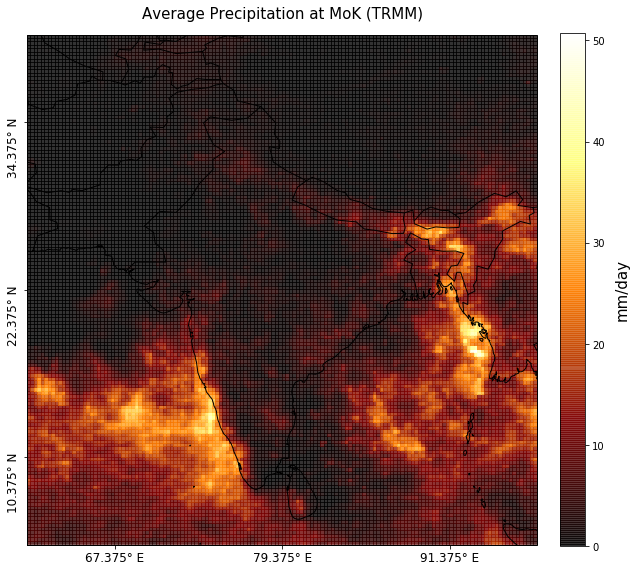

In [55]:
Visualization.create_cartopy_vis(prec_onset, title='Average Precipitation at MoK (TRMM)', filename='output/prec_avg_onset.png', **prec_params)

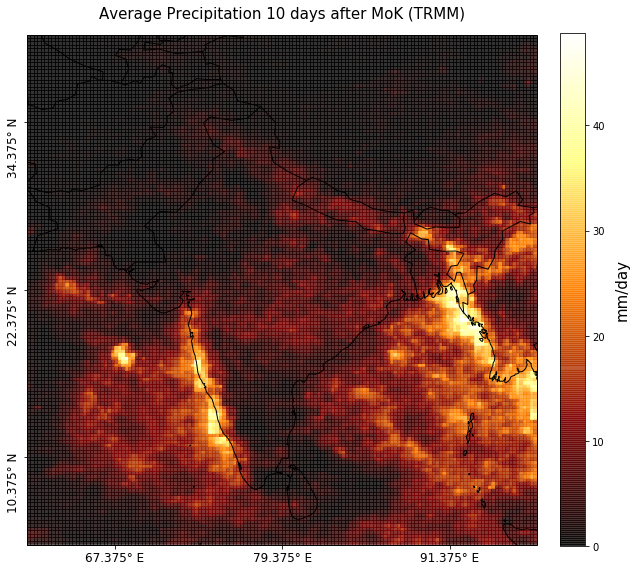

In [56]:
Visualization.create_cartopy_vis(prec_plus10, title='Average Precipitation 10 days after MoK (TRMM)', filename='output/prec_avg_plus10.png', **prec_params)

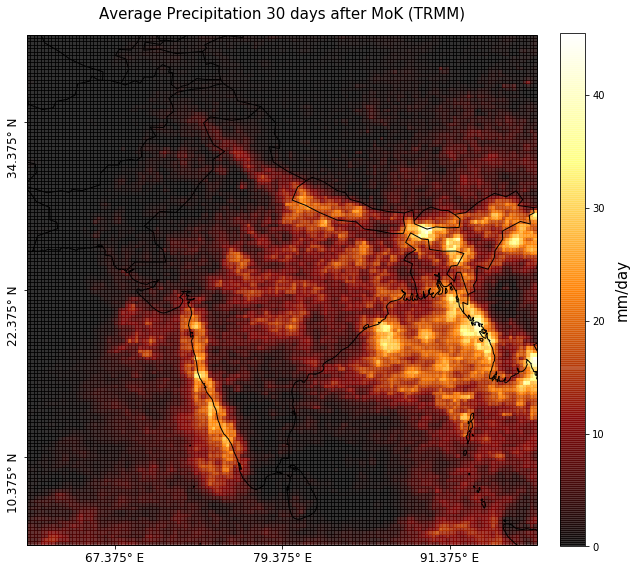

In [57]:
Visualization.create_cartopy_vis(prec_plus30, title='Average Precipitation 30 days after MoK (TRMM)', filename='output/prec_avg_plus30.png', **prec_params)